## File for creating training and validation datasets

In [1]:
import sys
from pathlib import Path

sys.path.append(str(Path("..").resolve()))

In [2]:
import matplotlib.pyplot as plt
import numpy as np

def plot_labels(labels, bins=50):
    # Show distribution of labels
    fig, (ax1, ax2, ax3) = plt.subplots(3,1)

    ax1.hist(labels[...,0], color='b',label='First principal component', bins=bins)
    ax2.hist(labels[...,1], color='r', label='Second principal component', bins=bins)
    ax3.hist(np.rad2deg(labels[:,2]), color='k', label='Angle')

    ax1.set_xlabel('Diffusion coeff')
    ax2.set_xlabel('Diffusion coeff')
    ax3.set_xlabel('Angle (deg)')

    fig.supylabel('Count')
    fig.suptitle('Distribution of validation set labels')
    fig.legend(fontsize=7)
    fig.tight_layout()
    plt.show()

## Test set

### Single State

In [3]:
import numpy as np
from simulation import *
from settings import T, SINGLE_STATE_PROPS

# Set random seed for consistency in generation
#np.random.seed(1)

# Image parameters
N = 5000 # number of particles to simulate

videos, displacement, labels = create_training_set_w_features(N, T, SINGLE_STATE_PROPS, dt=0.001)

In [4]:
print(videos.shape)
print(displacement.shape)
print(labels.shape)

(5000, 30, 11, 11)
(5000, 29, 2)
(5000, 3)


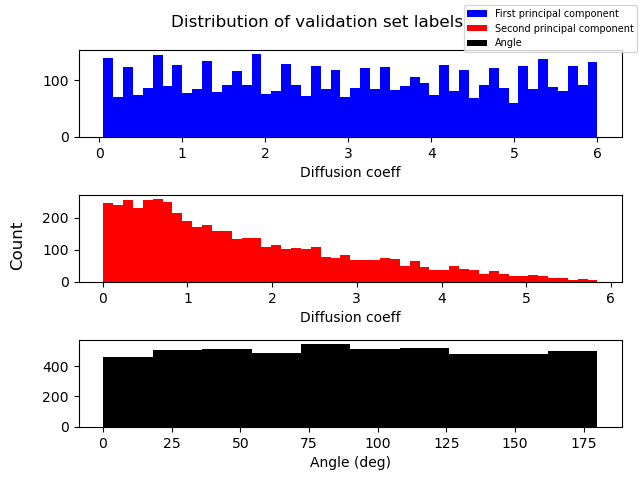

In [5]:
plot_labels(labels)

In [6]:
# Write data to file
np.savez('../data/validation_data_11.npz', vids=videos, disp=displacement, labels=labels)

In [7]:
from simulation import play_video

i = np.random.randint(0,N)

play_video(videos[i])

vmin: -0.1658496856689453 vmax: 0.804587721824646 mean: 0.09


### Multi-state

In [16]:
import numpy as np
from simulation import *
from settings import T, BINDING_IMAGE_PROPS, ISOTROPIC_PROPS

# Image parameters
N = 5000 # number of particles to simulate

videos, displacement, labels = create_multi_state_dataset_w_features(N, T, ISOTROPIC_PROPS, binding=False)

In [17]:
print(videos.shape, displacement.shape, labels.shape)

(5000, 30, 11, 11) (5000, 29, 2) (5000, 30, 3)


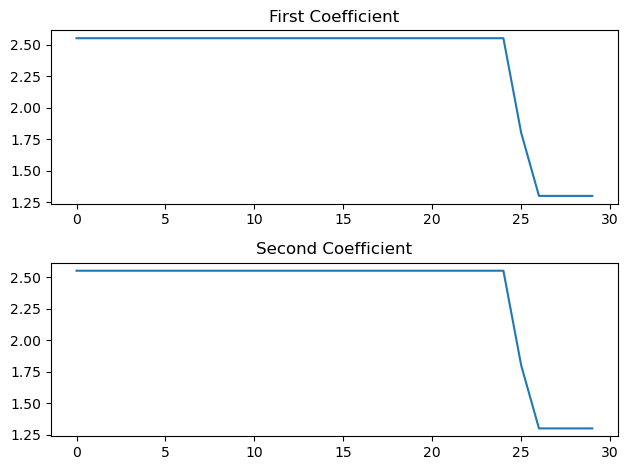

In [40]:
import matplotlib.pyplot as plt

fig, (ax,ax2) = plt.subplots(2,1)
i = np.random.randint(0, labels.shape[0])
ax.plot(labels[i, :, 0])
ax.set_title('First Coefficient')
ax2.plot(labels[i,:, 1])
ax2.set_title('Second Coefficient')
plt.tight_layout()

plt.show()

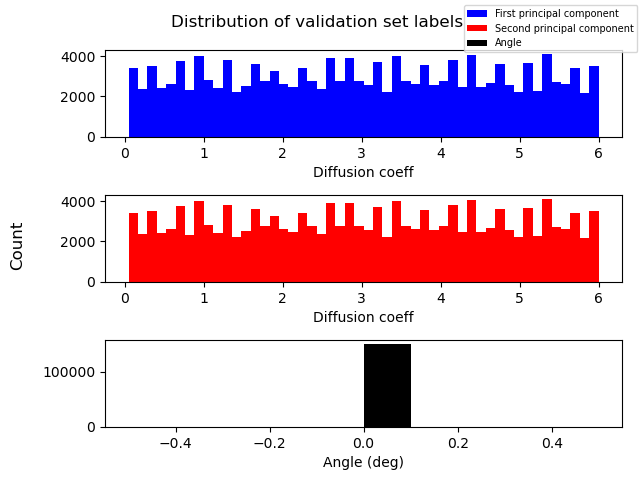

In [41]:
plot_labels(labels.reshape(-1, 3))

In [42]:
from simulation import play_video

i = np.random.randint(0,N)

play_video(videos[i])

vmin: -0.14193107187747955 vmax: 0.6302328109741211 mean: 0.09


In [43]:
# Write data to file
np.savez('../data/multi_state_iso_11.npz', vids=videos, disp=displacement, labels=labels)

## Training set

In [ ]:
import numpy as np
from simulation import *

# Set random seed for consistency in generation
np.random.seed(150)

# Image parameters
N = 500000 # number of particles to simulate
nPosPerFrame = 10 
nFrames = 30
T = nFrames * nPosPerFrame
# values from Real data
background_mean,background_sigma = 1420, 290
part_mean, part_std = 6000 - background_mean,500

image_props = {
    "n_pos_per_frame": nPosPerFrame,
    "frames": nFrames,
    "particle_intensity": [
        part_mean,
        part_std,
    ],  # Mean and standard deviation of the particle intensity
    "NA": 1.46,  # Numerical aperture
    "wavelength": 500e-9,  # Wavelength
    "psf_division_factor": 1.3,  
    "resolution": 100e-9,  # Camera resolution or effective resolution, aka pixelsize
    "output_size": 9,
    "upsampling_factor": 5,
    "background_intensity": [
        background_mean,
        background_sigma,
    ],  # Standard deviation of background intensity within a video
    "poisson_noise": 100,
    "gaussian_noise": True,
    "trajectory_unit" : 1200,
    "D_min": 1,
    "D_max": 10,
    "angle_max": np.pi
}

videos, displacement, labels = create_training_set_w_features(N, T, image_props)

In [2]:
print(videos.shape)
print(displacement.shape)
print(labels.shape)

(500000, 30, 9, 9)
(500000, 29, 2)
(500000, 3)


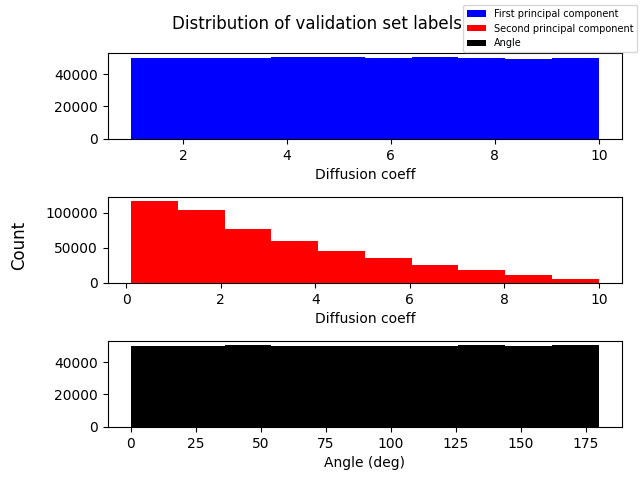

In [10]:
import matplotlib.pyplot as plt

# Show distribution of labels
fig, (ax1, ax2, ax3) = plt.subplots(3,1)

ax1.hist(labels[:,0], color='b',label='First principal component')
ax2.hist(labels[:,1], color='r', label='Second principal component')
ax3.hist(np.rad2deg(labels[:,2]), color='k', label='Angle')

ax1.set_xlabel('Diffusion coeff')
ax2.set_xlabel('Diffusion coeff')
ax3.set_xlabel('Angle (deg)')

fig.supylabel('Count')
fig.suptitle('Distribution of validation set labels')
fig.legend(fontsize=7)
fig.tight_layout()
plt.show()

In [14]:
# Write data to file
np.savez('../data/train_data.npz', vids=videos, disp=displacement, labels=labels)